# ロジスティック回帰(２値分類なので回帰ではない)

ラベルの値は0または1とする。  
与えられた特徴量のサンプル$\boldsymbol{x}\in\mathbb{R}^d$に対して，ラベルyが1になる確率を$P(Y=1|X=\boldsymbol{x})$で表し，yが0になる確率を$P(Y=0|X=\boldsymbol{x})$で表す。

$$
    P(Y=1|X=\boldsymbol{x})=\rho(w_0 + \sum_{j=1}^{d}x_{j}w_{j})=\rho(\boldsymbol{w}^{T}\tilde{\boldsymbol{x}})
$$

シグモイド関数
$$
    \rho(\zeta)=\frac{1}{1+\exp(-\zeta)} \\
    \frac{d\rho}{d\zeta} = \rho(\zeta)(1-\rho(\zeta))
$$

確率
$$
\begin{align}
    P(Y=y|X=\boldsymbol{x}) &= P(Y=1|X=\boldsymbol{x})^{y}P(Y=0|X=\boldsymbol{x})^{1-y} \\
    & = \rho(\boldsymbol{w}^{T}\tilde{\boldsymbol{x}})^{y}(1-\rho(\boldsymbol{w}^{T}\tilde{\boldsymbol{x}}))^{1-y}
\end{align}
$$

尤度関数
$$
    P(\boldsymbol{y}|\boldsymbol{X}) = \prod_{k=1}^{n}\bigl[\rho(\boldsymbol{w}^{T}\tilde{\boldsymbol{x}}_{k})^{y_k}(1-\rho(\boldsymbol{w}^{T}\tilde{\boldsymbol{x}}_{k}))^{1-y_k}\bigr]
$$

対数尤度関数の双対→コスト関数とみなす
$$
    E(\boldsymbol{w})=-\log P(\boldsymbol{y}|\boldsymbol{X}) = -\sum_{k=1}^{n}\bigl[y_{k}\log \rho(\boldsymbol{w}^{T}\tilde{\boldsymbol{x}}_{k}) + (1-y_{k})\log (1-\rho(\boldsymbol{w}^{T}\tilde{\boldsymbol{x}}_{k}))\bigr]
$$

最適化手法としてコスト関数$E(\boldsymbol{w})$の導関数$\nabla E(\boldsymbol{w})=0$に__ニュートン法__を用いる  
$\nabla E(\boldsymbol{w})$を更に微分してヘッセ行列$\boldsymbol{H}=\nabla^2 E(\boldsymbol{w})$を計算する。
$$
\begin{align}
    \nabla E(\boldsymbol{w}) &= -\sum_{k=1}^{n}\biggl[y_k(1-\rho(\boldsymbol{w}^{T}\tilde{\boldsymbol{x}}_k))\tilde{\boldsymbol{x}}_k - (1-y_k)\rho(\boldsymbol{w}^{T}\tilde{\boldsymbol{x}}_k)\tilde{\boldsymbol{x}}_k\biggr] \\
    &= \sum_{k=1}^{n}(\rho(\boldsymbol{w}^T\tilde{\boldsymbol{x}}_k)-y_k)\tilde{\boldsymbol{x}}_k
\end{align}
$$

ここで，
$$
    \hat{\boldsymbol{y}}=\bigl(\rho(\boldsymbol{w}^{T}\tilde{\boldsymbol{x}}_1), \rho(\boldsymbol{w}^{T}\tilde{\boldsymbol{x}}_2), \cdots, \rho(\boldsymbol{w}^{T}\tilde{\boldsymbol{x}}_n) \bigr)^T
$$
とおくと，行列$\tilde{\boldsymbol{X}}$を使って，次のように簡潔に書ける。  
$$
    \nabla E(\boldsymbol{w}) = \tilde{\boldsymbol{X}}^{T}(\hat{\boldsymbol{y}}-\boldsymbol{y})
$$

ヘッセ行列$\boldsymbol{H}$の(i,j)成分$H_{ij}$は，  
$$
    \begin{align}
        H_{ij} &= \frac{d}{dw_j}\biggl[\sum_{k=1}^{n}\bigl(\rho(\boldsymbol{w}^{T}\tilde{\boldsymbol{x}_k})-y\bigr)x_{ki} \biggr] \\
        &= \sum_{k=1}\rho(\boldsymbol{w}^{T}\tilde{\boldsymbol{x}_k})(1-\rho(\boldsymbol{w}^{T}\tilde{\boldsymbol{x}}_k))x_{ki}x_{kj} \\
        &= \sum_{k=1}^{n}\hat{y}_k(1-\hat{y}_k)x_{ki}x_{kj}
    \end{align}
$$

ヘッセ行列を  
$$
    \boldsymbol{R}= diag(\hat{y}_1(1-\hat{y}_1), \hat{y}_2(1-\hat{y}_2), \cdots, \hat{y}_n(1-\hat{y}_n))
$$
を用いて表すと  
$$
    \boldsymbol{H}=\tilde{\boldsymbol{X}}^{T}\boldsymbol{R}\tilde{\boldsymbol{X}}
$$

ニュートン法
$$
    \boldsymbol{w}^{new} = \boldsymbol{w}^{old} - \boldsymbol{H}^{-1}\nabla E(\boldsymbol{w}^{old})
$$

$$
\begin{align}
    \boldsymbol{w}^{new} &= \boldsymbol{w}^{old} - (\boldsymbol{X}^{T}\boldsymbol{R}\boldsymbol{X})^{-1}\boldsymbol{X}^{T}(\hat{\boldsymbol{y}}-\boldsymbol{y}) \\
    &= (\boldsymbol{X}^{T}\boldsymbol{R}\boldsymbol{X})^{-1}\boldsymbol{X}^{T}\boldsymbol{R}\boldsymbol{X}\boldsymbol{w}^{old} - (\boldsymbol{X}^{T}\boldsymbol{R}\boldsymbol{X})^{-1}\boldsymbol{X}^{T}\boldsymbol{R}\boldsymbol{R}^{-1}(\hat{\boldsymbol{y}}-\boldsymbol{y})\\
    &= (\boldsymbol{X}^{T}\boldsymbol{R}\boldsymbol{X})^{-1}(\boldsymbol{X}^{T}\boldsymbol{R})[\boldsymbol{X}\boldsymbol{w}^{old}-\boldsymbol{R}^{-1}(\hat{\boldsymbol{y}}-\boldsymbol{y})]
\end{align}
$$

※$\boldsymbol{R}$の値も$\boldsymbol{w}$に依存するので，$\boldsymbol{w}$を更新するたびに，計算し直す必要がある。

１次連立方程式
$$
    (\boldsymbol{X}^{T}\boldsymbol{R}\boldsymbol{X})\boldsymbol{w}^{new} = (\boldsymbol{X}^{T}\boldsymbol{R})[\boldsymbol{X}\boldsymbol{w}^{old}-\boldsymbol{R}^{-1}(\hat{\boldsymbol{y}}-\boldsymbol{y})]
$$

### ロジスティック回帰

In [1]:
import numpy as np
from scipy import linalg

THRESH_MIN = 1e-10

def sigmoid(x):
    return 1 / (1 + np.exp(-x))

class NativeLogisticRegression:
    def __init__(self, tol=0.001, max_iter=3, random_seed=0):
        self.tol_ = tol
        self.max_iter_ = max_iter
        self.random_state_ = np.random.RandomState(random_seed)
        self.w_ = None
        
    def fit(self, X, y):
        self.w_ = self.random_state_.randn(X.shape[1] + 1)
        Xtil = np.c_[np.ones(X.shape[0]), X]
        diff = np.inf
        # prev_w = self.w_
        iter = 0
        
        while diff > self.tol_ and iter < self.max_iter_:
            yhat = sigmoid(np.dot(Xtil, self.w_)) # Xtilがnサンプルの特徴行列だからw^T*XtilではなくXtil*wとする
            r = np.clip(yhat * (1 - yhat), THRESH_MIN, np.inf) # 対角行列は1次元配列で表現して，ブロードキャストで演算する
            XR = Xtil.T * r # 行方向のブロードキャスト
            XRX = np.dot(Xtil.T * r, Xtil)
            prev_w = self.w_
            b = np.dot(XR, np.dot(Xtil, self.w_) - 1 / r * (yhat - y)) # 1/rはR^-1
            self.w_ = linalg.solve(XRX, b) # １次連立方程式
            diff = abs(prev_w - self.w_).mean() # ニュートン法判定
            iter += 1
            
    def predict(self, X):
        Xtil = np.c_[np.ones(X.shape[0]), X]
        yhat = sigmoid(np.dot(Xtil, self.w_))
        return np.where(yhat > 0.5, 1, 0) # ２値判定

In [3]:
import csv
import numpy as np

n_test = 100
X = []
y = []

with open("./回帰分析_data/wdbc.csv") as fp:
    for row in csv.reader(fp, delimiter=","):
        if row[1] == "B":
            y.append(0)
        else:
            y.append(1)
        X.append(row[2:])
        
y = np.array(y, dtype=np.float64)
X = np.array(X, dtype=np.float64)
y_train = y[:-n_test]
X_train = X[:-n_test]
y_test = y[-n_test:]
X_test = X[-n_test:]

model = NativeLogisticRegression(tol=0.01)
model.fit(X_train, y_train)

y_predict = model.predict(X_test)
n_hits = (y_test == y_predict).sum()
print("Accuracy: {}/{} = {}".format(n_hits, n_test, n_hits / n_test))

Accuracy: 97/100 = 0.97


# scikit-learn ロジスティック回帰

https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html#sklearn.linear_model.LogisticRegression

In [ ]:
from sklearn import datasets
import numpy as np
import matplotlib.pyplot as plt

領域分類の関数

In [3]:
from matplotlib.colors import ListedColormap

def plot_decision_regions(X, y, classifier, test_idx=None, resolution=0.02):
    markers = ('s', 'x', 'o', '^', 'v')
    colors = ('red', 'blue', 'lightgreen', 'gray', 'cyan')
    cmap = ListedColormap(colors[:len(np.unique(y))])

    x1_min, x1_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    x2_min, x2_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    
    xx1, xx2 = np.meshgrid(np.arange(x1_min, x1_max, resolution), np.arange(x2_min, x2_max, resolution))

    # ZはN次元の予測値ベクトル
    Z = classifier.predict(np.array([xx1.ravel(), xx2.ravel()]).T)
    Z = Z.reshape(xx1.shape)
    print("xx1.ravel()", len(xx1.ravel()), xx1.ravel())
    print("xx2.ravel()", len(xx2.ravel()), xx2.ravel())

    plt.contourf(xx1, xx2, Z, alpha=0.4, cmap=cmap)
    plt.xlim(xx1.min(), xx1.max())
    plt.ylim(xx2.min(), xx2.max())

    # クラス毎にサンプルをプロット
    for idx, cl in enumerate(np.unique(y)):
        plt.scatter(x=X[y == cl, 0], y=X[y == cl, 1], alpha=0.8, c=cmap(idx), marker=markers[idx], label=cl)

    # テストサンプルを目立たせる（点を○で表示)
    if test_idx:
        X_test, y_test = X[test_idx, :], y[test_idx]
        plt.scatter(X_test[:, 0], X_test[:, 1], c='', edgecolors='black', alpha=1.0, linewidths=1, marker='o', s=55, label='test set')
        

データセットの準備

In [4]:
iris = datasets.load_iris()
X = iris.data[:, [2, 3]]
y = iris.target

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
sc.fit(X_train)
X_train_std = sc.transform(X_train)
X_test_std = sc.transform(X_test)
X_combined_std = np.vstack((X_train_std, X_test_std))
y_combined = np.hstack((y_train, y_test))

/Users/inoueshinichi/.pyenv/versions/anaconda3-5.0.1/envs/Education/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/Users/inoueshinichi/.pyenv/versions/anaconda3-5.0.1/envs/Education/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & '

xx1.ravel() 67575 [-2.57496421 -2.55496421 -2.53496421 ...  2.66503579  2.68503579
  2.70503579]
xx2.ravel() 67575 [-2.45241201 -2.45241201 -2.45241201 ...  2.62758799  2.62758799
  2.62758799]


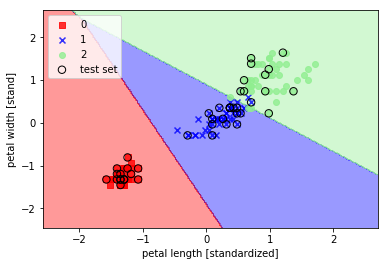

[[1.78177322e-11 6.12453348e-02 9.38754665e-01]]


In [6]:
from sklearn.linear_model import LogisticRegression

lr = LogisticRegression(C=1000.0, random_state=0)
lr.fit(X_train_std, y_train)

plot_decision_regions(X=X_combined_std, y=y_combined, classifier=lr, test_idx=range(105, 150))
plt.xlabel('petal length [standardized]')
plt.ylabel('petal width [stand]')
plt.legend(loc='upper left')
plt.show()

# 1サンプルの所属確率を求める
print(lr.predict_proba(X_test_std[0, :].reshape(1, 2)))

所属確率から所属ラベルを決定

In [7]:
lr.predict_proba(X_test_std[:3, :]).argmax(axis=1)

array([2, 1, 0])

In [8]:
lr.predict(X_test_std[:3, :])

array([2, 1, 0])

### コスト関数にL2ノルムを入れて正則化を効かせる

正則化係数Cが小さいほど正則化の効果がある

/Users/inoueshinichi/.pyenv/versions/anaconda3-5.0.1/envs/Education/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/Users/inoueshinichi/.pyenv/versions/anaconda3-5.0.1/envs/Education/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
/Users/inoueshinichi/.pyenv/versions/anaconda3-5.0.1/envs/Education/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/Users/inoueshinichi/.pyenv/versions/anaconda3-5.0.1/envs/Education/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:460: FutureWarning: Default multi_class will be changed to 

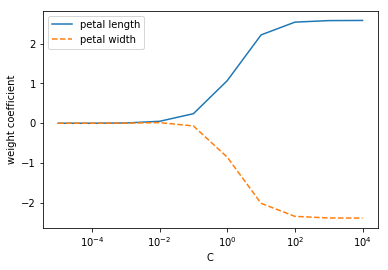

In [9]:
# 空のリストを生成（重み係数、逆正則化パラメータ）
weights, params = [], []
# 10個の逆正則化パラメータに対応するロジスティック回帰モデルをそれぞれ処理
for c in np.arange(-5.0, 5.0, 1):
    lr = LogisticRegression(C=10**c, random_state=0)
    lr.fit(X_train_std, y_train)
    # 重み係数を格納
    weights.append(lr.coef_[1])
    # 逆正則化パラメータを格納
    params.append(10**c)

# 重み係数をNumPy配列に計算
weights = np.array(weights)
# 横軸に逆正則化パラメータ、縦軸に重み係数をプロット
plt.plot(params, weights[:, 0], label='petal length')
plt.plot(params, weights[:, 1], linestyle='--', label='petal width')
plt.ylabel('weight coefficient')
plt.xlabel('C')
plt.legend(loc='upper left')
# 横軸を対数スケールに設定
plt.xscale('log')
plt.show()